# <center>Uczenie maszynowe</center>

<br>

<br>

## <center>Proces rozwiązywania problemów z zastosowaniem uczenia maszynowego</center>

<img src="Grafika/CRISP_DM_Process_Diagram.png" width="350">
Źródło: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/897px-CRISP-DM_Process_Diagram.png

<br>

<br>

<br>

<br>

<br>




 <br>

## Kilka faktów na temat uczenia maszynowego

* ML to zarówno nauka jak i sztuka.

* Nie istnieje metoda "najlepsza" - każdy problem wymaga indywidualnego podejścia.

* Rozwiązanie problemu ML = reprezentacja danych + algorytm.

  - w codziennej praktyce pierwszy czynnik często niedoceniany. Przetworzanie danych jest równie ważne jak same algorytmy, a nawet często dane są ważniejsze od algorytmu - często większy wpływ na wyniki ma postać danych (ich przygotowanie/przetworzenie) niż wybór konkretnego algorytmu.

* Bardzo ważne jest zdefiniowanie celu jaki chcemy osiągnąć i rozumienie jak dane i algorytmy z tym celem się wiążą.


 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 ## Dwa główne nurty uczenia maszynowego:
* uczenie nadzorowane (*supervised learning*)
* uczenie nienadzorowane (*unsupervised learning*)

  <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
## Uczenie nadzorowane

Dla znanych par (X,Y) szukamy zależności między X a Y - budujemy model, który na podstawie X przewidzi Y.
 

* regresja: Y jest zmienną rzeczywistą

* klasyfikacja: Y jest zmienną dyskretną (np. binarną - o wartościach 0 i 1)

 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
## Zagadnienie klasyfikacji - przykłady:
- predykcja churnu - przewidywanie na podstawie cech klienta (opisujących m.in. jego zachowanie) czy klient odejdzie w najbliższym czasie (np. w ciągu miesiąca);
- scoring kredytowy - przewidywanie czy klient ubiegający się o kredyt spłaci go w terminie;
- rozpoznawanie choroby - rozpoznawanie na podstawie parametrów medycznych czy pacjent zachoruje/jest chory;
- klasyfikacja tematyczna tekstu;
- klasyfikacja wydźwięku opini;
- rozpoznawanie zawartosci obrazów.

# Regresja logistyczna

Rozważamy problem klasyfikacji binarnej: $X \in \mathbb{R}^p$, $Y \in \{0, 1\}$.

Założenia modelu:

$$
Y =
\begin{cases}
1, \text{ z prawdopodobieństwem } \pi(x)\\
0, \text{ z prawdopodobieństwem } 1-\pi(x).\\
\end{cases}$$

, gdzie

$\pi(x)=P(Y=1 \mid x)$.

Czyli innymi słowy:

$$\large Y \sim B(\pi(x)),$$


B($\cdot$) - rozkład dwupunktowy, 


Model:

$$\large \pi(x) = \frac{1}{1+e^{-\beta x}},$$

$\beta = (\beta_0,\beta_1, \ldots, \beta_p),$   $\beta x = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p.$

 <br>
 
 <br>
 
Predykcja wartości Y przy użyciu regresji logistycznej:

$$
\hat{y} =
\begin{cases}
1, \text{ gdy } \pi(x) > 0.5\\
0, \text{ gdy } \pi(x) \leq 0.5\\
\end{cases}
$$
 
 <br>
 
 <br>
 
 <br>

Dopasowanie modelu = znalezienie optymalnych wartości współczynników wektora $\beta$, czyli takich, które najlepiej opisują zależność $Y$ od $X$. 

 <br>
 
 <br>
 
 <br>
 
Najlepiej czyli jak?
 
## Metoda największej wiarogodności
 
Rozważmy sytuację binarną. tzn. $y \in \{0,1\}$. Logarytm funkcji wiarogodności wygląda następująco (X zbiór obserwacji, Y - zbiór etykiet):

$ 
\begin{align}
L(\beta \ | \ X,Y) & = \log \prod\limits_{i=1}^n P(Y_i=y_i \ | \ x_i) \\
       & = \log \prod\limits_{i=1}^n \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i} \\
       & = \sum\limits_{i=1}^n \log\big( \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i}\big) \\
       & = \sum\limits_{i=1}^n y_i\log(\pi(x_i)) + (1-y_i)\log(1-\pi(x_i)) .
\end{align}
$

Przyjmijmy oznaczenie: $h(\pi(x),y) = y\log{(\pi(x))} + (1-y)\log{(1-\pi(x))}.$
Zauważmy, że:

$h(\pi(x),1) = \log{(\pi(x))}$

$h(\pi(x),0) = \log{(1-\pi(x))}$

Jeżeli $y=1$ to model jest tym lepszy im $\pi(x)$ jest większe. Jeżeli $y=0$, to model jest tym lepszy im $\pi(x)$ jest mniejsze, czyli $1 - \pi(x)$ większe.

Dopasowywanie modelu regresji logistycznej polega na maksymalizacji funkcji wiarogodności (technicznie - jej logarytmu) - szukamy (numerycznie) takiego wektora $\beta$, dla którego wiarogodność jest największa.


In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
?load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
X = data.data
y = data.target

In [5]:
pip install feature

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement feature (from versions: none)
ERROR: No matching distribution found for feature


## Train test split

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
y.mean()

0.6274165202108963

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.preprocessing import scale

In [10]:
model = LogisticRegression(max_iter=1000)


In [11]:
model.fit(scale(X), y)

LogisticRegression(max_iter=1000)

In [12]:
model.predict(scale(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [13]:
model.intercept_

array([0.21456573])

In [14]:
model.coef_.shape

(1, 30)

In [15]:
model.coef_

array([[-0.36317072, -0.38770299, -0.35111444, -0.43555896, -0.16176493,
         0.56259548, -0.85989759, -0.96222175,  0.07616775,  0.32218585,
        -1.29103479,  0.26892526, -0.65988685, -1.01250087, -0.27717046,
         0.7362824 ,  0.11052647, -0.3335099 ,  0.29590225,  0.68091528,
        -1.02936114, -1.31459312, -0.82331706, -1.01059356, -0.67073135,
         0.04465888, -0.87330064, -0.91195815, -0.88789694, -0.47983137]])

In [16]:
y_predict_proba = model.predict_proba(scale(X))

In [17]:
y_predict_proba

array([[9.99999999e-01, 1.20816634e-09],
       [9.99967996e-01, 3.20043729e-05],
       [9.99999837e-01, 1.63263949e-07],
       ...,
       [9.88252945e-01, 1.17470550e-02],
       [1.00000000e+00, 3.00486460e-11],
       [1.97458032e-05, 9.99980254e-01]])

In [18]:
y_predict_proba.shape

(569, 2)

In [19]:
y_predict_proba[:1, :] # dla pierwszego wiersza prawdopodobienstwo dla klasy o i klasy 1 

array([[9.99999999e-01, 1.20816634e-09]])

In [20]:
y_predict_proba[:1, 1]  #  dla pierwszego wiersza dprawdopodobienstwo dla klasy 1 

array([1.20816634e-09])

In [21]:
y_predict_proba[:, 1] # dla wszytskich wierszy prawdopodobientwo dlasy 1 

array([1.20816634e-09, 3.20043729e-05, 1.63263949e-07, 4.92804792e-04,
       2.98863126e-05, 4.69417500e-02, 3.60045679e-05, 2.09346230e-02,
       2.50142250e-03, 9.30212304e-05, 5.25949757e-02, 9.23274422e-04,
       1.62617707e-04, 3.27610918e-01, 2.42405485e-02, 6.65238889e-05,
       2.40633077e-03, 5.39254616e-06, 9.79171687e-10, 9.26131804e-01,
       9.98691845e-01, 9.99988327e-01, 3.38520147e-03, 3.75815072e-09,
       3.42357869e-09, 2.05790576e-07, 2.43048663e-04, 4.09581498e-05,
       3.00051472e-06, 2.10588771e-02, 1.82717723e-08, 2.30905399e-03,
       1.26029404e-06, 4.58321462e-07, 3.81873420e-04, 3.12923473e-05,
       2.65505629e-02, 9.99946303e-01, 1.44879228e-01, 1.01996957e-01,
       8.85797129e-01, 1.82629084e-01, 4.48051997e-08, 3.55211157e-02,
       8.21120548e-02, 9.24679215e-07, 9.99996279e-01, 5.60305640e-03,
       9.94330054e-01, 8.43041066e-01, 9.99137368e-01, 9.99144480e-01,
       9.99643918e-01, 3.77269338e-04, 4.39951669e-02, 9.97663511e-01,
      

In [22]:
# OCENA KLASYFIKACJI MIARA ACCURACY 

from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
from sklearn.metrics import accurancy_score


ImportError: cannot import name 'accurancy_score' from 'sklearn.metrics' (c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\__init__.py)

In [23]:
pip install sklearn.metrics

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


In [24]:
pip install sklearn.metrics

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


In [25]:
from sklearn.metrics import accurancy_score

ImportError: cannot import name 'accurancy_score' from 'sklearn.metrics' (c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\__init__.py)

In [26]:
acc = accurancy_score(y_true=y, y_pred=model.predict(scale(X)))

NameError: name 'accurancy_score' is not defined

In [27]:
acc

NameError: name 'acc' is not defined

In [28]:
import sklearn

In [29]:
model = LogisticRegression(max_iter=1000, solver='warn')
model.fit(X, y, )

ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got warn.

In [30]:
import sklearn

In [31]:
sklearn.__version__

'0.23.2'

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
acc = accuracy_score(y_true=y, y_pred=model.predict(scale(X)))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scale(X), y, test_size=0.3)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [36]:
accuracy_score(y_train, y_pred_train)

0.9874371859296482

In [37]:
accuracy_score(y_test, y_pred_test)

0.9649122807017544

In [38]:
acc_test_list = []
acc_train_list = []
for x in range(100):
    X_train, X_test, y_train, y_test = train_test_split(scale(X), y, test_size=0.3)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    acc_test_list.append(accuracy_score(y_test, y_pred_test))
    acc_train_list.append(accuracy_score(y_train, y_pred_train))

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

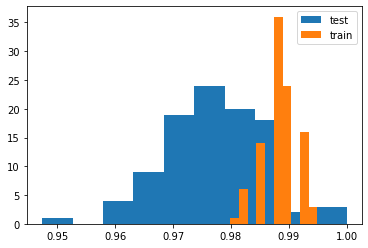

In [40]:
plt.hist(acc_test_list, label='test')
plt.hist(acc_train_list, label='train')
plt.legend()

In [41]:
# walidacja krzyżowa 

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cv_results = cross_val_score(LogisticRegression(), scale(X), y, cv=10)

In [44]:
cv_results

array([0.98245614, 0.98245614, 0.98245614, 0.96491228, 0.98245614,
       0.98245614, 0.94736842, 1.        , 1.        , 0.98214286])

In [45]:
cv_results.mean()

0.9806704260651629

In [46]:
cv_results.std()

0.01456955548732776

# Regularyzacja

Regularyzacja - zabezpieczenie przed przeuczeniem.

### Dopasowanie modelu

<img src="Grafika/regularization.jpg" width="600">
Źródło: https://i.ytimg.com/vi/nmHNXsDPPFQ/maxresdefault.jpg


## Regularyzacja w regresji logistycznej

Regularyzacja w regresji logistycznej polega na dodaniu do celu optymalizacyjnego kary za wielkości współczynników w $\beta$.

Przypomnijmy, że w regresji logistycznej estymator wektora $\beta$ ma postać:

$$\hat{\beta} = arg \max\limits_{\beta} \sum\limits_{i=1}^n h(\pi(x_i),y_i).$$

W oczywisty sposób jest to równoważne rozwiązywaniu problemu:

$$\hat{\beta} = arg \min\limits_{\beta} -\sum\limits_{i=1}^n h(\pi(x_i),y_i).$$

### Regresja z regularyzacją L2:

$$\hat{\beta} = arg \min\limits_{\beta} \big( -\sum\limits_{i=1}^n h(\pi(x_i),y_i) + \lambda\|\beta\|_2^2 \big),$$

$\|\beta\|_2$ - norma l2 wektora $\beta$: $\sqrt{\sum\limits_{i=1}^p\beta_i^2}$,

$\lambda$ - współczynnik regularyzacji.

Skąd wziąć wartość $\lambda$? Trzeba wyznaczyć sobie empirycznie - przetestować model  z różnymi wartościami i wybrać tę, dla której wyniki są najlepsze.

**W sklearnie za regularyzację odpowiada parametr C i jest on odwrotnoscią parametru $\lambda$, tzn. $C = \frac{1}{\lambda}$. Zatem im mniejsze C, tym silniejsza regularyzacja.**


### Równie często stosowana jest norma l1: $\sum\limits_{i=1}^p|\beta_i|$. 

#### Uwaga: Norma L1 zeruje współczynniki! 


Na marginesie: w modelach w uczeniu maszynowym pojawiają sie bardzo różne formy regularyzacji, których często nawet nie będziemy świadomi.

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [48]:
x = np.linspace(-1, 1, num=100)
x

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [49]:
beta = np.array([-0.5, 5])

In [50]:
prob = 1 / (1+np.exp(-(beta[0] + beta[1] *x)))

In [51]:
prob

array([0.00407014, 0.0045008 , 0.0049768 , 0.00550286, 0.00608419,
       0.00672651, 0.00743614, 0.00822001, 0.00908576, 0.01004177,
       0.01109725, 0.01226229, 0.01354796, 0.01496639, 0.01653084,
       0.01825579, 0.02015705, 0.02225182, 0.02455883, 0.0270984 ,
       0.02989254, 0.03296501, 0.03634146, 0.04004942, 0.04411838,
       0.04857982, 0.05346719, 0.05881586, 0.06466303, 0.07104762,
       0.07801003, 0.08559186, 0.09383557, 0.10278402, 0.11247991,
       0.12296507, 0.13427977, 0.14646172, 0.15954517, 0.1735597 ,
       0.18852913, 0.20447023, 0.22139149, 0.23929188, 0.25815971,
       0.27797161, 0.29869176, 0.32027131, 0.34264818, 0.36574724,
       0.38948085, 0.41374989, 0.43844515, 0.46344916, 0.48863832,
       0.51388532, 0.53906165, 0.56404027, 0.58869807, 0.61291832,
       0.63659276, 0.65962334, 0.68192365, 0.70341983, 0.72405114,
       0.74377004, 0.76254197, 0.78034479, 0.79716791, 0.81301132,
       0.82788438, 0.84180463, 0.85479651, 0.86689013, 0.87812

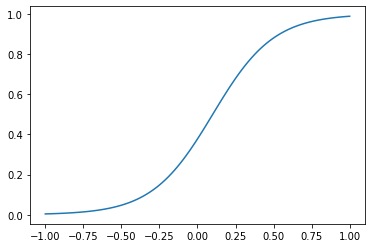

In [52]:
plt.plot(x, prob)

In [53]:
y = np.random.binomial(1, prob)  # losuje 1 a ajk nie wylosuje to losuje 0

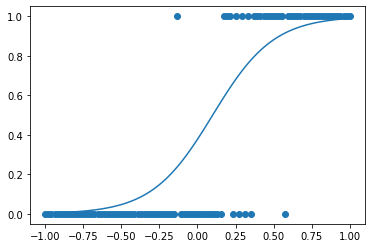

In [54]:
plt.plot(x, prob)
plt.scatter(x, y)

In [55]:
X = np.vstack([x**p for p in range(1,20)]).T # dodanie kolumn z kolejnymi potegami

In [56]:
X.shape

(100, 19)

In [57]:
model = LogisticRegression(C=100000) # uczymy model bez regularyzacji
model.fit(X[:, :1,], y)

LogisticRegression(C=100000)

In [58]:
model.intercept_,model.coef_

(array([-2.10963394]), array([[8.69713251]]))

In [59]:
beta # jestesmy w miare blisko prawdziwych wartosci beta. Zobaczmy jak wyglada psotac funkcji wypracowanej przez model

array([-0.5,  5. ])

In [60]:
y_predict_proba = model.predict_proba(X[:, :1])[:, 1]

In [61]:
y_predict_proba

array([2.02615266e-05, 2.41532658e-05, 2.87924906e-05, 3.43227612e-05,
       4.09152060e-05, 4.87738138e-05, 5.81417413e-05, 6.93088306e-05,
       8.26205681e-05, 9.84887605e-05, 1.17404257e-04, 1.39952105e-04,
       1.66829615e-04, 1.98867869e-04, 2.37057345e-04, 2.82578444e-04,
       3.36837817e-04, 4.01511634e-04, 4.78597062e-04, 5.70473523e-04,
       6.79975545e-04, 8.10479364e-04, 9.66005822e-04, 1.15134255e-03,
       1.37218892e-03, 1.63532789e-03, 1.94882945e-03, 2.32229123e-03,
       2.76712251e-03, 3.29687897e-03, 3.92765611e-03, 4.67855053e-03,
       5.57219883e-03, 6.63540463e-03, 7.89986429e-03, 9.40300173e-03,
       1.11889213e-02, 1.33094845e-02, 1.58255121e-02, 1.88081036e-02,
       2.23400564e-02, 2.65173456e-02, 3.14506041e-02, 3.72665068e-02,
       4.41089177e-02, 5.21396072e-02, 6.15382766e-02, 7.25015583e-02,
       8.52405860e-02, 9.99766754e-02, 1.16934635e-01, 1.36333281e-01,
       1.58372878e-01, 1.83219549e-01, 2.10987124e-01, 2.41717579e-01,
      

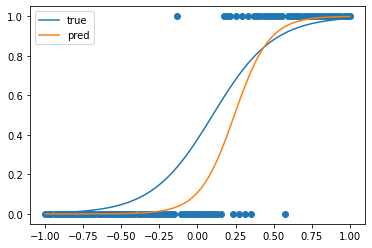

In [62]:
plt.plot(x, prob, label='true')
plt.plot(x, y_predict_proba, label='pred')
plt.scatter(x, y)
plt.legend()

In [63]:
model = LogisticRegression(C=100000) # uczymy model bez regularyzacji
model.fit(X, y)

LogisticRegression(C=100000)

In [64]:
model.intercept_, model.coef_

(array([-2.33759661]),
 array([[   4.67672007,   20.30028451,   40.14427189, -153.38688889,
           12.35685922,   20.61648803,   53.94450416,   57.47538108,
           57.98532355,   50.47364756,   42.29600192,   33.218625  ,
           25.51510026,   18.93247001,   13.8209209 ,    9.94421776,
            7.00952939,    4.98538963,    3.40533705]]))

In [65]:
y_pred_proba = model.predict_proba(X)[:, 1]

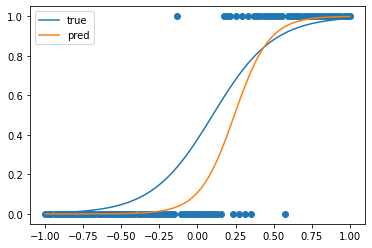

In [66]:
plt.plot(x, prob, label='true')
plt.plot(x, y_predict_proba, label='pred')
plt.scatter(x, y)
plt.legend()

In [67]:
model = LogisticRegression(C=10) # uczymy model bez regularyzacji
model.fit(X, y)
model.intercept_, model.coef_


(array([-1.68744326]),
 array([[5.95104528, 1.24838569, 1.25776667, 0.25001731, 0.44065745,
         0.117947  , 0.24228882, 0.08096935, 0.15940151, 0.05688467,
         0.11135705, 0.0388022 , 0.08059881, 0.0260761 , 0.06040001,
         0.01755593, 0.04690075, 0.01195865, 0.03766692]]))

In [68]:
y_pred_proba = model.predict_proba(X)[:, 1]

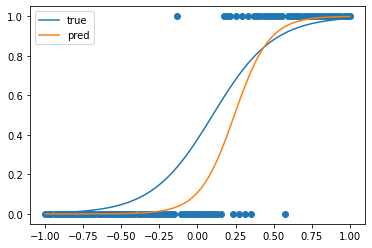

In [69]:
plt.plot(x, prob, label='true')
plt.plot(x, y_predict_proba, label='pred')
plt.scatter(x, y)
plt.legend()

### Zadanie: 

Narysować wykresy krzywych prawdopodobieństwa w zależności od C.

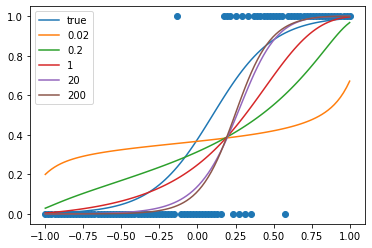

In [70]:
plt.scatter(x, y)
plt.plot(x, prob, label='true')

for c in [0.02, 0.2, 1, 20, 200]:
    model = LogisticRegression(C=c)
    model.fit(X, y)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    
    plt.plot(x, y_pred_proba, label=str(c))

    
plt.legend() # po pętli rysujemy legendę
#plt.savefig('regularization.png', dpi=300, bbox_inches = 'tight')

In [71]:
model = LogisticRegression(penalty = '12', C=0.01)
model.fit(X, y)
model.coef_

ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

### Jak stwierdzić czy model jest dobrze dopasowany? Czy nie za słabo, ani za mocno?

1. Gdy na zbiorze testowym niski procent poprawnych predykcji (np. 60%), a na treningowym model bardzo dobrze dopasowany (np. 90%) -> model przeuczony

2. Gdy na zbiorze treningowym model bardzo nisko dopasowany (np. rzędu pięćdziesiąt kilka procent) -> model słabo dopasowany.

Co to jest niskie dopasowanie? -> zależy od danych...

Co to jest duża różnica? -> zależy od danych... (i ich wielkości - istotność statystyczna!). Realnie, wyniki na testowym powinny być trochę niższe od dopasowania na treningowym (najlepiej, gdy są takie same, ale jednak z reguły będą niższe). Klasyfikator w oczywisty sposób nie może działać lepiej niż dopasowanie na zbiorze treningowym - bo dopasowanie pokazuje jak dużo zależności wykrył w danych, na podstawie których będzie klasyfikował. Zatem jeżeli mamy dopasowanie na zbiorze treningowym np. 90%, to maksymalna moc predykcyjna jakiej możemy oczekiwać to 90%.

## Przygotowanie danych

Czy wartości zmiennych mają wpływ na wynik modelu?

Wyobraźmy sobie dwie zmienne, gdzie jedna ma wielkości rzędu 1, a druga rzędu 100, a rzeczywisty współczynnik przy pierwszej wynosi 1, a przy drugiej 0.01.

Jak konsekwencje będzie miało zastosowanie regularyzacji?

Zmienna pierwsza zostanie dużo mocniej "ukarana" niż druga, tzn. model mocno "ściągnie" współczynnik przy pierwszej, a zostawi przy drugiej...

Jak temu zaradzić? -> skalowanie

In [72]:
from sklearn.preprocessing import StandardScaler # KOLUMNA PO JEGO WYKORZYTSANIU MA ODCHYLENIE STANDARODWE 1 

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [74]:
scaler.mean_, scaler.scale_

(array([-0.00080717,  0.02084999,  0.00038134, -0.007781  ,  0.01172586,
         0.00786526,  0.00999317,  0.01297087, -0.00702866,  0.0023192 ,
         0.00037653,  0.03329839, -0.00659183, -0.02209555,  0.03180983,
         0.01510474,  0.0095278 ,  0.03551268,  0.01028744,  0.04405798,
        -0.0028625 ,  0.00594305, -0.00512591, -0.01099131,  0.017053  ,
        -0.02174603, -0.0130456 , -0.00099144, -0.02028637, -0.0111368 ]),
 array([0.96804828, 1.00055394, 0.9698042 , 0.95225781, 1.02669452,
        0.99912086, 0.99153926, 0.99193999, 1.02056295, 1.01313553,
        0.87920591, 1.01033158, 0.86976313, 0.76540561, 1.01808385,
        1.03613865, 1.00081219, 1.03739867, 0.97558345, 1.09769937,
        0.96488224, 0.97753544, 0.96495914, 0.94660009, 1.01374067,
        0.95101349, 0.9598925 , 0.98842715, 1.00542493, 0.96070146]))

In [75]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Pipeline

In [76]:
from sklearn.pipeline import Pipeline

In [77]:
pipe = Pipeline(steps = [('standarize', StandardScaler()),
                        ('clasifier', LogisticRegression())
                        ])

In [78]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standarize', StandardScaler()),
                ('clasifier', LogisticRegression())])

In [79]:
pipe.predict(X_test)

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [80]:
pipe.predict_proba(X_test)[:, 1]

array([6.07732210e-04, 9.99997695e-01, 2.00686552e-03, 1.50544163e-09,
       9.02530889e-01, 9.30882196e-01, 9.91945460e-01, 9.97300163e-01,
       9.92969672e-01, 6.25571282e-10, 9.99596856e-01, 9.99937639e-01,
       4.64076331e-06, 9.99952356e-01, 9.96250744e-01, 9.99739776e-01,
       9.70068914e-01, 4.26728117e-04, 3.21094294e-02, 9.99998422e-01,
       9.98154681e-01, 6.96778422e-05, 1.74879288e-20, 7.52776298e-01,
       9.99537270e-01, 9.99703380e-01, 9.65777546e-01, 4.54815135e-06,
       4.43843530e-09, 9.99385425e-01, 9.99303866e-01, 5.21056990e-01,
       9.54290198e-01, 9.99971224e-01, 9.98744832e-01, 9.99520877e-01,
       9.93989102e-01, 8.68943575e-14, 9.81408028e-01, 1.96642974e-08,
       9.99988410e-01, 9.95964240e-01, 1.66286683e-03, 7.08881516e-02,
       9.98889467e-01, 9.99679219e-01, 9.34920235e-01, 9.99965710e-01,
       8.97439250e-01, 7.89347368e-01, 3.30832630e-03, 8.45313491e-01,
       1.24338613e-02, 6.50859362e-04, 1.64238329e-07, 9.67174779e-01,
      

In [81]:
accuracy_score(y_true=y_test, y_pred=pipe.predict(X_test))

0.9883040935672515

In [82]:
# GRID SEARCH

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
?GridSearchCV

In [85]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01, .01, 1, 10, 100]
}
param_grid

{'penalty': ['l1', 'l2'], 'C': [0.01, 0.01, 1, 10, 100]}

In [86]:
grid = GridSearchCV(estimator=LogisticRegression(solver='liblinear',
                                                 max_iter=1000),
                   param_grid=param_grid,
                   cv=10)

In [87]:
grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.01, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [88]:
grid.cv_results_

{'mean_fit_time': array([7.97986984e-04, 8.97336006e-04, 6.97803497e-04, 7.36212730e-04,
        1.99627876e-04, 5.98478317e-04, 2.99191475e-04, 5.98645210e-04,
        4.07004356e-04, 9.98020172e-05]),
 'std_fit_time': array([0.000399  , 0.00029914, 0.00045683, 0.00040919, 0.00039926,
        0.00048866, 0.00045702, 0.00048879, 0.00049896, 0.00029941]),
 'mean_score_time': array([1.99437141e-04, 1.00040436e-04, 2.78162956e-04, 1.99460983e-04,
        4.46629524e-04, 2.47049332e-04, 2.98953056e-04, 3.98921967e-04,
        9.16719437e-05, 6.98614120e-04]),
 'std_score_time': array([0.00039887, 0.00030012, 0.00042839, 0.00039892, 0.00056303,
        0.0005063 , 0.00045666, 0.00048858, 0.00027502, 0.00045736]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.01, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l

In [89]:
grid.best_estimator_

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')

In [90]:
grid.best_params_

{'C': 1, 'penalty': 'l1'}

In [91]:
# wersja z pipelinem

In [92]:
pipe = Pipeline(steps = [('standarize', StandardScaler()),
                        ('clasifier', LogisticRegression())
                        ])

In [93]:
param_grid = {
    'standardize__with_mean' : [True, False],
    'clasifier__penalty' : ['l1', 'l2'], # wzorzec definiowania siatki: <id_modelu>__<nazwa_parametru>
    '_clasifier__C' : [0.01, .01, 1, 10, 100]
}
param_grid

{'standardize__with_mean': [True, False],
 'clasifier__penalty': ['l1', 'l2'],
 '_clasifier__C': [0.01, 0.01, 1, 10, 100]}

In [94]:
gird = GridSearchCV(estimator=pipe, 
                   param_grid=param_grid,
                   cv=100)

In [95]:
grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.01, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [96]:
grid.best_estimator_

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')

In [97]:
grid.best_estimator_.step

AttributeError: 'LogisticRegression' object has no attribute 'step'

# Drzewo decyzyjne

Załóżmy, że mamy dwie zmienne ($X[0], X[1]$) i problem klasyfikacji binarnej ($Y \in \{0,1\}$).


<img src="Grafika/decision_tree.png" style="width: 600px">


## Jak rośnie drzewo?

Drzewo rośnie od korzenia - tzn. budujemy model od góry. Będąc w aktualnym węźle szukamy najlepszego podziału - rozpatrujemy wszystkie zmienne ze wszystkimi możliwymi podziałami i tworzymy rozgałęzienie według najlepszej opcji.

Co to znaczy najlpszy podział? Rozważmy klasyfikację binarną.

<br>

<br>

Opcja nr 1: Gini impurity (Miara Gini'ego niespójności węzła):
- wybieramy podział, który minimalizuje ważoną miarę Giniego $g(p) = 2p(1-p)$:

$$\frac{n_1}{N}g(p_1) + \frac{n_2}{N}g(p_2),$$

gdzie $n_1, n_2$ liczności w pierwszym i drugim dziecku, $N = n_1 + n_2$, $p_1, p_2$ - procent obserwacji, dla których $Y=1$ w dzieciach 1 i 2.

<img src="Grafika/gini_entropy.png" style="width: 400px">

<br>

Opcja nr 2: Entropia.
- wybieramy podział, który daje najmniejszą wartość ważonej entropii $h(p) = -p\log{(p)} - (1-p)\log{(1-p)}$:

$$\frac{n_1}{N} h(p_1) + \frac{n_2}{N}h(p_2),$$

gdzie $p_1, p_2$ - procent obserwacji, dla których $Y=1$ w dzieciach 1 i 2.

## Do kiedy tworzymy nowe podziały? 

Możliwe są różne warunki stopu. Najpopularniejsze to:

- maksymalna głębokość drzewa,
- minimalna liczba obserwacji w liściu.

Często stosowane w połączeniu.

In [98]:
from sklearn.tree import DecisionTreeClassifier 
#drzewa decyzyjne nie wymagają skalowania danych

In [99]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
accuracy_score(y_test, model.predict(X_test))

0.9298245614035088

In [102]:
accuracy_score(y_train, model.predict(X_train)) # przeuczony model, nauczmy z regularyzacja

1.0

In [103]:
model = DecisionTreeClassifier(min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [104]:
accuracy_score(y_test, model.predict(X_test)) # model przeuczony, jest lepiej 

0.9298245614035088

In [105]:
accuracy_score(y_train, model.predict(X_train))

0.957286432160804

#### Zadanie 

Wczytaj zbiór `zbiór1.txt` (funkcja loadtxt w numpy) i podziel go na część uczącą (200 obserwacji) i testową (100). Dopasuj model regresji logistycznej na zbiorze uczącym i oblicz accuracy na zbiorze testowym. Następnie oblicz procent poprawnych dopasowań na zbiorze treningowym.

Następnie narysuj 4 histogramy wartości obu zmiennych w pozbiorach wyznaczonych przez wartość $Y$. Czy widzisz jakąś zależność między zmiennymi objaśniającymi a zmienną objaśnianą?

Następnie zbuduj drzewo klasyfikacyjne i policz dla niego accuracy.

In [106]:
dane = np.loadtxt('Dane/zbior1.txt')

In [107]:
dane

array([[9.97683602e-01, 9.14219315e-01, 1.00000000e+00],
       [3.82992661e-01, 4.16007683e-01, 1.00000000e+00],
       [6.31764757e-02, 3.13137825e-01, 1.00000000e+00],
       [1.07037831e-01, 6.30734059e-01, 0.00000000e+00],
       [6.13159979e-01, 7.07122512e-01, 1.00000000e+00],
       [1.51604518e-01, 9.84973259e-01, 0.00000000e+00],
       [1.13515624e-01, 6.89658585e-01, 0.00000000e+00],
       [2.59236702e-01, 1.26432266e-01, 1.00000000e+00],
       [3.39117454e-01, 3.87364131e-01, 1.00000000e+00],
       [3.80756140e-01, 5.70747135e-02, 1.00000000e+00],
       [8.90311349e-01, 8.49988550e-01, 1.00000000e+00],
       [6.71105058e-01, 5.24037197e-01, 1.00000000e+00],
       [8.92528458e-01, 5.19178452e-01, 1.00000000e+00],
       [5.55760880e-01, 4.68699116e-02, 0.00000000e+00],
       [8.19745258e-01, 3.55194574e-02, 0.00000000e+00],
       [8.78102548e-01, 7.11245317e-02, 0.00000000e+00],
       [5.98806637e-01, 6.99927994e-01, 1.00000000e+00],
       [5.92424697e-01, 2.21511

In [108]:
X = dane[:, :2]
y = dane[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)


In [109]:
model = LogisticRegression()  # regresja logistyczna nauczony model
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
accuracy_score(y_train, model.predict(X_train)) # bardzo niedouczony model

0.61

In [111]:
accuracy_score(y_test, model.predict(X_test))

0.58

In [112]:
y.mean() # srednia

0.5133333333333333

Text(0.5, 0, 'X=1')

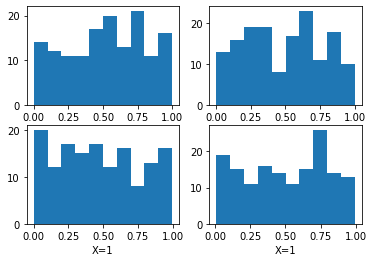

In [113]:
plt.subplot(221)
ax = plt.hist(X[y==0, 0])
plt.xlabel('y=0')

plt.subplot(222)
ax = plt.hist(X[y==1, 0])
plt.xlabel('y=1')

plt.subplot(223)
ax = plt.hist(X[y==0, 1])
plt.xlabel('X=1')

plt.subplot(224)
ax = plt.hist(X[y==1, 1])
plt.xlabel('X=1')

In [114]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [115]:
accuracy_score(y_train, tree.predict(X_train))

0.995

In [116]:
accuracy_score(y_test, tree.predict(X_test))

0.96

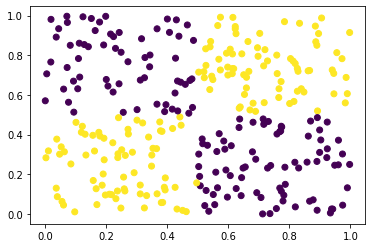

In [117]:
# jak na prawdę wyglądają te dane
plt.scatter(X[:, 0], X[:, 1], c=y)

In [118]:
# rysowanie drzewa 

from sklearn.tree import export_graphviz

In [119]:
export_graphviz(tree, 'drzewo.dot')

### Bardzo ważna sprawa: wnioskowanie o zależności zmiennych na podstawie analizy jednowymiarowej nie ma większego sensu!

- jeśli nie widać zależności, to nie znaczy, że jej nie ma,
- jeżeli widać zależność, to wcale nie musi oznaczać zależności przyczynowo-skutkowej (dana cecha może być skorelowana z inną cechą, która faktycznie wpływa na y).
- zjawisko fałszywej korelacji - statystycznie rzecz biorąc, regularnie zdarzają się sytuacje, kiedy zmienne wyglądają na zależne, a tak naprawde nie są...

#### Naturalnie analiza wielowymiarowa (model) też może nie wykryć zależności... Sztuka analizy danych polega między innymi na szukaniu tych zależności.

# Klasyfikacja wieloklasowa

## Regresja logistyczna



\begin{align}
\Pr(Y_i=1) &= \frac{1}{Z} e^{\boldsymbol\beta_1 \cdot \mathbf{X}_i} \, \\
\Pr(Y_i=2) &= \frac{1}{Z} e^{\boldsymbol\beta_2 \cdot \mathbf{X}_i} \, \\
\cdots & \cdots \\
\Pr(Y_i=K-1) &= \frac{1}{Z} e^{\boldsymbol\beta_{K-1} \cdot \mathbf{X}_i} \, \\
\Pr(Y_i=K) &= \frac{1}{Z} e^{\boldsymbol\beta_{K} \cdot \mathbf{X}_i}\, \\
\end{align}


$Z = \sum_{k=1}^{K} e^{\boldsymbol\beta_k \cdot \mathbf{X}_i}$

Możliwe są również inne warianty. https://en.wikipedia.org/wiki/Multinomial_logistic_regression


Inny zapis powyższego:

$$[P(Y=1), P(Y=2), \ldots , P(Y=K)] = softmax([\beta_1x, \beta_2x, \ldots , \beta_Kx]) = $$
$$[\frac{e^{\beta_1x}}{\sum_{k=1}^{K}e^{\beta_kx}}, \frac{e^{\beta_2x}}{\sum_{k=1}^{K}e^{\beta_kx}}, \ldots, \frac{e^{\beta_Kx}}{\sum_{k=1}^{K}e^{\beta_k x}}]$$

Na marginesie: w uczeniu maszynowym często pojawia sie funkcja "softmax". 

$$softmax(\mathbf{x}) = softmax([x_1, x_2, \ldots , x_p])= [\frac{e^{x_1}}{\sum_{k=1}^{p}e^{x_k}}, \frac{e^{x_2}}{\sum_{k=1}^{p}e^{x_k}}, \ldots, \frac{e^{x_p}}{\sum_{k=1}^{p}e^{x_k}}]$$

W literaturze czasem mozna spotkać nazwanie regresji logistycznej dla klasyfikacji wieloklasowej klasyfikatorem softmax.

## Drzewo decyzyjne

Przyjmujemy oznaczenie: $p = (p_1, p_2, \ldots, p_K)$ wektor prawdopodobieństw poszczególnych klas (procent obserwacji danej klasy).

Opcja nr 1: Gini impurity (Miara Gini'ego niespójności węzła):
- wybieramy podział, który minimalizuje ważoną miarę Gini'ego $g(p) = \big( 1 - \sum\limits_{k=1}^K p_k^2 \big)$:

$$\frac{n_1}{N} g(p_1) + \frac{n_2}{N} g(p_2),$$

gdzie $n_1, n_2$ liczności w pierwszym i drugim dziecku, $p_1, p_2$ - rozkłady klas w dzieciach.

<br>

Opcja nr 2: Entropia.
- wybieramy podział, który daje najmniejszą wartość ważonej entropii $h(p) = -\sum\limits_{k=1}^K p_k\log p_k$:

$$\frac{n_1}{n}\sum\limits_{i=1}^{n_1} h(p_1) + \frac{n_2}{n}\sum\limits_{i=1}^{n_2} h(p_2)$$


In [120]:
from sklearn import datasets
iris = datasets.load_iris()

In [121]:
X = iris.data
y = iris.target

In [122]:
model = LogisticRegression()
model.fit(X, y)
model.intercept_, model.coef_

c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([  9.84186228,   2.21913963, -12.06100191]),
 array([[-0.41943756,  0.96749376, -2.5205723 , -1.084326  ],
        [ 0.53147635, -0.3150198 , -0.20094963, -0.94785159],
        [-0.11203879, -0.65247397,  2.72152193,  2.03217759]]))

#### Zadanie

Wygeneruj predykcje kroswalidacyjnie dla regresji logistycznej i drzewa decyzyjnego (użyj `cross_val_predict`), a następnie wypisz accuracy dla obu modeli.

In [123]:
from sklearn.model_selection import cross_val_predict

In [124]:
y_pred = cross_val_predict(LogisticRegression(), X, y, cv=5)
y_pred

c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [125]:
accuracy_score(y, y_pred)

0.9733333333333334

# Naiwny klasyfikator Bayes'a

Rozważmy klasyfikację wieloklasową - $Y \in \{1, 2, \ldots, K\}$. 

Naiwny klasyfikator Bayesa klasyfikuje obserwacje na podstawie prawdopodobieństwa:

$$p(Y = k \mid x_1, \dots, x_p)  = p(C_k \mid x_1, \dots, x_p).$$

Predykcja klasyfikatora to najbardziej prawdopodobna klasa.

Skąd klasyfikator bierze to prawdopodobieństwo? Oblicza je przyjmując pewne założenia...

Z twierdzenia Bayesa:


$$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})}.$$

Zauważmy, że $p(\mathbf{x})$, czyli rozkład X, jest nieistotny dla klasyfikatora, zatem: 

$$p(C_k \mid \mathbf{x}) \sim p(C_k) \ p(\mathbf{x} \mid C_k).$$

$p(C_k)$ - prawdopodobieśtwo a priori klasy $C_k$ - czyli procent obserwacji w danych, dla których $Y = k$.

$p(\mathbf{x} \mid C_k) = p(x_1, x_2, \ldots, x_p \mid C_k)$ - rozkład cech w pozbiorze danych, dla których $Y = C_k$.


(**Naiwne**) założenie modelu:

$$p(x_1, x_2, \ldots, x_p \mid C_k) = p(x_1 \mid C_k)\cdot p(x_2\mid C_k) \cdot \ldots \cdot p(x_p \mid C_k)$$

Zatem predykcja klasyfikatora ma postać:

$$\hat{y} = arg \max\limits_k  p(C_k \mid \mathbf{x}) = arg \max\limits_k p(C_k) \prod\limits_{i=1}^p p(x_i\mid C_k)$$

Skąd bierzemy $p(x_i\mid C_k)$?

Z postaci danych:
- jeżeli zmienna $x_i$ jest binarna, to zakładamy, że rozkład jest dwupunktowy - prawdopodobieństwo sukcesu model wylicza empirycznie z danych,
- jeżeli zmienna $x_i$ jest licznością, to zakładamy, że rozkład jest wielomianowy - prawdopodobieństwa poszczególnych wartości model wylicza empirycznie z danych,
- jeżeli zmienna $x_i$ jest rzeczywista, to zakładamy, że rozkład jest normalny - parametry (średnią i wariancję) model estymuje z danych.

Uwaga: ostatnie wersja w praktyce z reguły działa słabo.

In [126]:
import pandas as pd

In [127]:
sms = pd.read_table('Dane/sms.tsv', header=None, names=['label', 'message'])

In [128]:
sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [129]:
sms.label = sms.label.map({'spam': 1 , 'ham': 0})

In [130]:
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
sms.label.mean() # udział spamu we wszytskich wiadomosciach

0.13406317300789664

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

In [133]:
vectorizer = CountVectorizer(max_features= 3000)
vectorizer.fit(sms.message)

CountVectorizer(max_features=3000)

In [134]:
x = vectorizer.transform(sms.message)
x

<5572x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 67227 stored elements in Compressed Sparse Row format>

In [135]:
x.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [136]:
vectorizer.vocabulary_  # która kolumna odpowiada za jakieś słowo

{'go': 1134,
 'until': 2754,
 'point': 2009,
 'crazy': 710,
 'available': 356,
 'only': 1866,
 'in': 1319,
 'bugis': 508,
 'great': 1166,
 'world': 2938,
 'la': 1439,
 'cine': 620,
 'there': 2614,
 'got': 1151,
 'wat': 2848,
 'ok': 1853,
 'lar': 1448,
 'joking': 1396,
 'wif': 2898,
 'oni': 1864,
 'free': 1044,
 'entry': 899,
 'wkly': 2920,
 'comp': 662,
 'to': 2661,
 'win': 2903,
 'fa': 944,
 'cup': 725,
 'final': 997,
 'tkts': 2656,
 '21st': 82,
 'may': 1641,
 '2005': 79,
 'text': 2591,
 '87121': 182,
 'receive': 2144,
 'question': 2093,
 'std': 2474,
 'txt': 2722,
 'rate': 2116,
 'apply': 309,
 'dun': 856,
 'say': 2251,
 'so': 2403,
 'early': 862,
 'already': 271,
 'then': 2612,
 'nah': 1773,
 'don': 825,
 'think': 2619,
 'he': 1221,
 'goes': 1138,
 'usf': 2775,
 'lives': 1519,
 'around': 327,
 'here': 1235,
 'though': 2629,
 'freemsg': 1046,
 'hey': 1236,
 'darling': 745,
 'it': 1367,
 'been': 400,
 'week': 2865,
 'now': 1829,
 'and': 285,
 'no': 1811,
 'word': 2932,
 'back': 371,
 

In [137]:
vocabulary = vectorizer.vocabulary_

In [138]:
vocabulary['go'] # go znajduje się na 1134 pozycji

1134

# Case study

Dane

http://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

In [139]:
sms = pd.read_table('Dane/sms.tsv', header=None, names=['label', 'message'])

# Cel: zaimplementować w pełni zautomatyzowane znajdowanie najlepszego modelu

Na samym początku wydzielić 1000 obserwacji na zbiór testowy, na którym na samym końcu przetestujemy najlepszy model. Podczas szukania najlepszego modelu nie dotykamy tego zbioru!

Wejście:
- lista modeli w postaci ogólnie, którą podaje się do funkcji Pipeline (czyili listy krotek dwuelementwych),
- lista siatek parametrów, które chcemy zbadać, dla odpowiadająych modeli,

Wyjście 
- na zbiorze testowym policzyć accuracy najlepszego modelu.

**Ważne** Każdą analizę (szukanie najlepszego modelu) zawsze należy zacząć od wyznaczenia punktu odniesienia. Czym powinien być punkt odniesienia? Jest to <u>prosta</u> metoda predykcji lub wręcz trywialna. Opcja 1: prosty klasyfikator z parametrami domyślnymi. Opcja 2. Predykcja trywialna - bezmodelowa, np. predykcja stała klasą dominującą (przykładowo jeżeli w danych jest np. $70\%$ oberwacji klasy 1, to predykcja stała równa 1 będzie miała accuracy $70\%$).

Zatem krok pierwszy - obliczenie baseline.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(sms.message, sms.label, test_size = 1000)

In [141]:
X_train

478                    Tension ah?what machi?any problem?
5242                                  Hmm thinking lor...
4172    Pls what's the full name of joke's school cos ...
2593    My friend just got here and says he's upping h...
3708                 Aight do you still want to get money
                              ...                        
3770    Was gr8 to see that message. So when r u leavi...
129     HEY GIRL. HOW R U? HOPE U R WELL ME AN DEL R B...
3504     Free any day but i finish at 6 on mon n thurs...
1329     My exam is for february 4. Wish you a great day.
4872                  Well. You know what i mean. Texting
Name: message, Length: 4572, dtype: object

In [142]:
# model baseline - domyślne parametry regresji logistycznej

In [143]:
baseline = Pipeline( steps=[
    ('vectorizer', CountVectorizer(max_features=3000)),
    ('scaler', StandardScaler(with_mean=False)),
    ('estimator', LogisticRegression())
])
baseline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=3000)),
                ('scaler', StandardScaler(with_mean=False)),
                ('estimator', LogisticRegression())])

In [144]:
accuracy_score(y_test, baseline.predict(X_test)) # bardzo wysoki próg wejścia 

0.981

In [145]:
# znajdzmy lepszy model

In [146]:
from sklearn.naive_bayes import MultinomialNB
models = [
    [ ('scaler', StandardScaler(with_mean=False)), ('estimator', LogisticRegression())],
    [('tree', DecisionTreeClassifier())],
    [('naive_bayes', MultinomialNB())]
]

param_grid = [
    {'scaler__with_std': [True, False],
     'estimator__C': [0.01, 0.1, 1, 10, 100]
    },
    {
     'tree__min_samples_leaf': [5, 10, 30, 50]
    },
    {}
]

In [147]:
vectorizer = [('vectorizer', CountVectorizer(max_features=3000))]

In [148]:
best_models = []

for pipe, params in zip(models, param_grid):
    pipeline = Pipeline(vectorizer + pipe)
    
    gs = GridSearchCV(estimator=pipeline, param_grid=params, cv=10)
    gs.fit(X_train, y_train)
    
    best_models.append(gs.best_estimator_)

In [149]:
for model in best_models:
    print(accuracy_score(y_test, model.predict(X_test)))

0.987
0.968
0.984


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

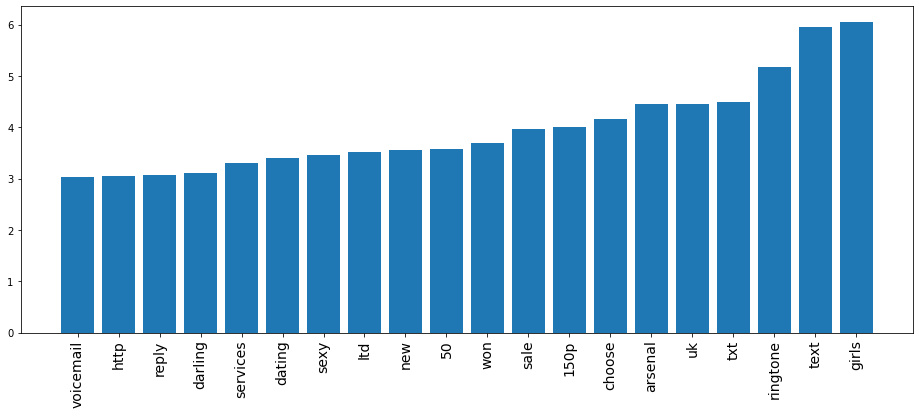

In [150]:
lr_model = best_models[0].steps[-1][-1]
vectorizer = best_models[0].steps[0][-1]
sorted_indices = np.argsort(np.abs(lr_model.coef_[0])) # sortujemy rosnąco względem wartości bezwględnej wag modelu
sorted_values = lr_model.coef_[0][sorted_indices]

id2word = np.array(vectorizer.get_feature_names())

plt.figure(figsize=(16, 6))
plt.bar(id2word[sorted_indices[-20:]], sorted_values[-20:])
plt.xticks(rotation=90, size=14)

In [151]:
sample_email = ['look at this sale! girls want to meet.', 'lets meet at Politechnika']

In [152]:
best_models[0].predict_proba(sample_email) # pierwsza predykacja klasy 0 i druga predykcja klasy 0 --> 1 to spam, 0 nie spam - dla pierwszego miala 
#93 % ze to jest spam i mniej ze nie jest spam

array([[7.13288129e-03, 9.92867119e-01],
       [9.99565480e-01, 4.34519995e-04]])

In [153]:
best_models[0].predict(sample_email) # tutaj już dostajemy czy spam i nie spam

array(['spam', 'ham'], dtype=object)